In [125]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'customer-segmentation-tutorial-in-python:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F42674%2F74935%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240827%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240827T154316Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0ecff054e96874431199e80eed4d854faf59976c4ed35c8c0e06c589870dc6ed8f38215e6361a03afb5558dde647f91cc6473fc247355ff5d9880ffaa46c03b1d28676bca7af7e08a86c585631602ff64512691c3701691613419cf516075b701b535d60fe60f9993c86cb6b822d71126341f1835ece2d837ac728c76b7940e2c0b16540bf2dc17b870b6945191ad8279fbcb63326095d391cef58fe97d88f5f0ae374e615a9b0ba07b6e8ee56136da72609f4d19c73c55f5ff507ef9c7b082b0af3c2c533f661ce79ada8718e0742a28fa364efe4836610dd9dbd62964a6725057a4e17336098af52743be3cfdffa856cbb16d842e3ee3f193060a37f4ff783'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1583 bytes downloaded
Downloaded and uncompressed: customer-segmentation-tutorial-in-python
Data source import complete.


In [126]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [128]:
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [130]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [131]:
df.rename(columns={'Annual Income (k$)':'Income'},inplace=True)
df.rename(columns={'Spending Score (1-100)':'Score'},inplace=True)

In [132]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [133]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


In [134]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Score,0


In [135]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [136]:
df.drop('CustomerID',axis=1,inplace=True)

In [137]:
df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


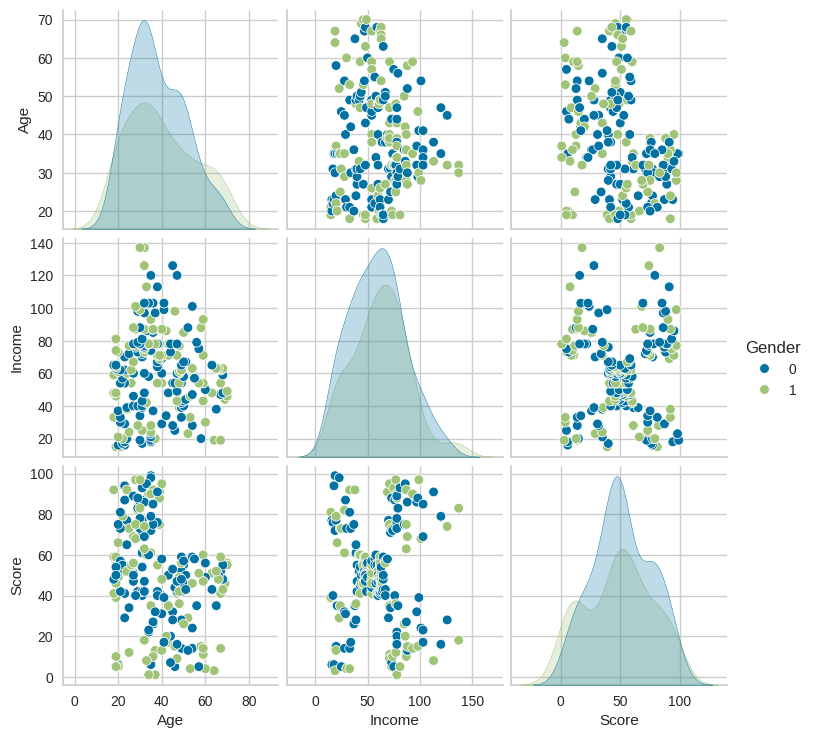

In [138]:
x=df.drop('Gender',axis=1)
sns.pairplot(df,hue='Gender')
plt.show()

In [139]:
#Elbow Method Poda Poren
from sklearn.cluster import KMeans
res=[]
lbls=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(x)
    lbls.append(km.labels_)
    res.append(km.inertia_)
print(res)

[308812.7800000001, 212840.16982097193, 143342.75157170597, 104366.151455562, 75350.77917248776, 58300.443321590676, 51116.98694463434, 44342.31739341741, 40623.36547212478, 37153.67212762972]


In [140]:
'''from sklearn.metrics import silhouette_score
for i in range(2,11):
    km=KMeans(n_clusters=i,random_state=0)
    pred=km.fit_predict(x)
    score=silhouette_score(x,pred)
    print(f'Silhouette Score for k={i} is {score}')'''

"from sklearn.metrics import silhouette_score\nfor i in range(2,11):\n    km=KMeans(n_clusters=i,random_state=0)\n    pred=km.fit_predict(x)\n    score=silhouette_score(x,pred)\n    print(f'Silhouette Score for k={i} is {score}')"

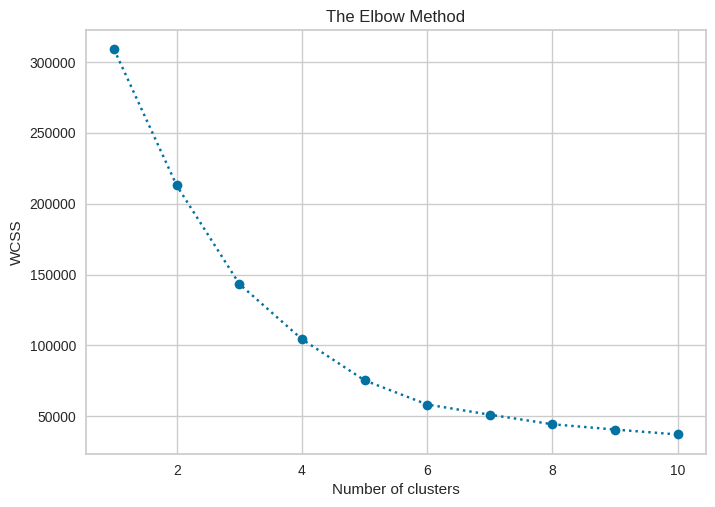

In [141]:
plt.plot(range(1,11),res,marker='o',linestyle=':')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<bound method Visualizer.show of KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10), k=(1, 11))>

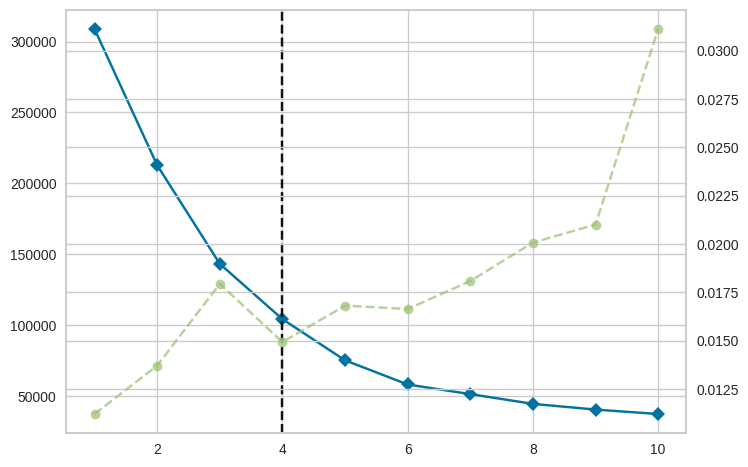

In [142]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,11))
visualizer.fit(x)
visualizer.show

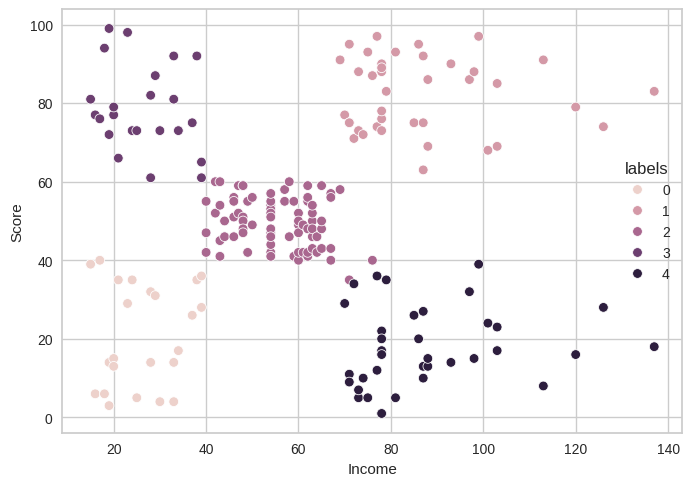

In [143]:
km=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0).fit(x)
x['labels']=km.labels_
sns.scatterplot(x='Income',y='Score',hue='labels',data=x)
plt.show()

In [144]:
df.columns

Index(['Gender', 'Age', 'Income', 'Score'], dtype='object')

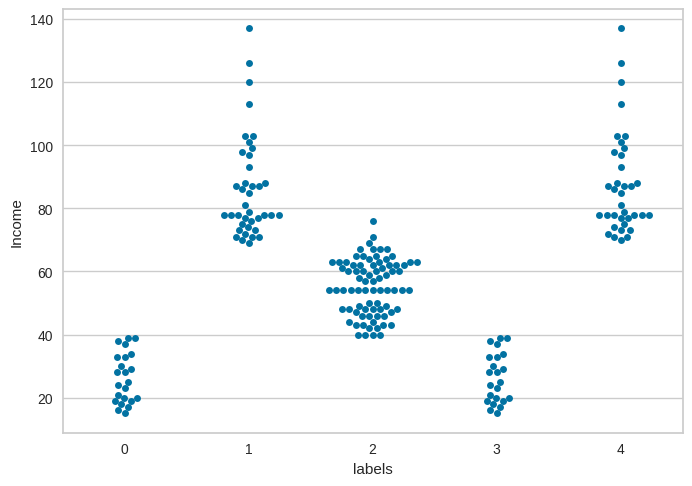

In [145]:
sns.swarmplot(x='labels',y='Income',data=x)
plt.show()

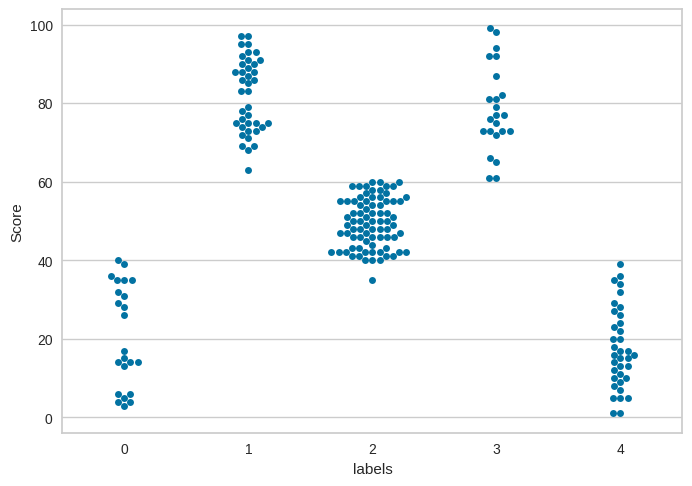

In [146]:
sns.swarmplot(x='labels',y='Score',data=x)
plt.show()

In [147]:
x

,Age,Income,Score,labels
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,4
197,32,126,74,1
198,32,137,18,4


In [148]:
u=x.drop('labels',axis=1)

Silhouette Score: 0.45


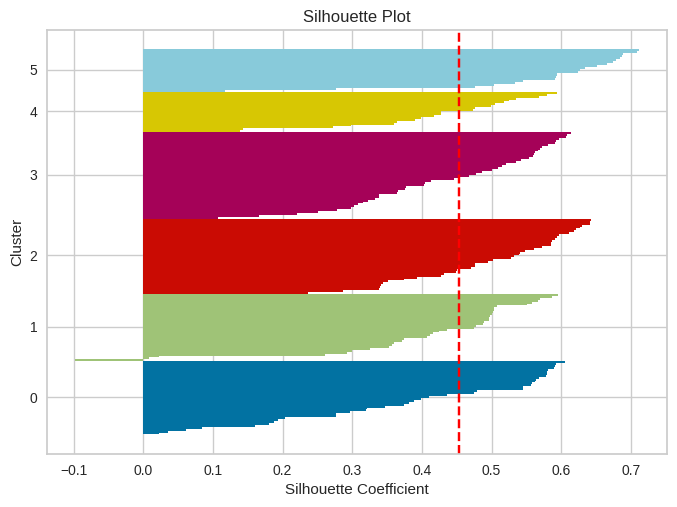

In [149]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Fit K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=0)
cluster_labels = kmeans.fit_predict(x)

# Calculate the silhouette score
sil_score = silhouette_score(x, cluster_labels)
print(f"Silhouette Score: {sil_score:.2f}")

# Silhouette Visualizer
def silhouette_visualizer(X, cluster_labels):
    n_clusters = len(np.unique(cluster_labels))
    silhouette_vals = silhouette_samples(X, cluster_labels)

    y_lower, y_upper = 0, 0
    yticks = []

    for i, cluster in enumerate(np.unique(cluster_labels)):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0)
        yticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)

    plt.axvline(x=sil_score, color="red", linestyle="--")
    plt.yticks(yticks, range(n_clusters))
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.title('Silhouette Plot')
    plt.show()

# Visualize the silhouette plot
silhouette_visualizer(x, cluster_labels)


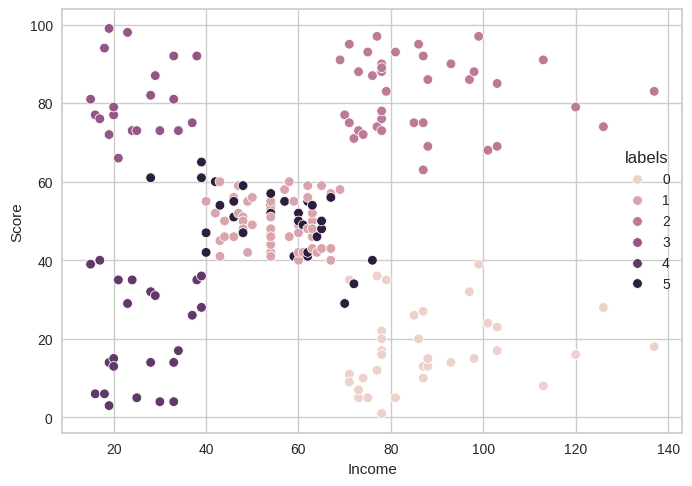

In [150]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=6)
agg.fit_predict(x)
x['labels']=agg.labels_
sns.scatterplot(x='Income',y='Score',hue='labels',data=x)
plt.show()

In [151]:
aggsilscore=silhouette_score(x,agg.labels_)
print(aggsilscore)

0.4458768117218558


In [152]:
x

,Age,Income,Score,labels
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,0
197,32,126,74,2
198,32,137,18,0


<Axes: xlabel='Income', ylabel='Score'>

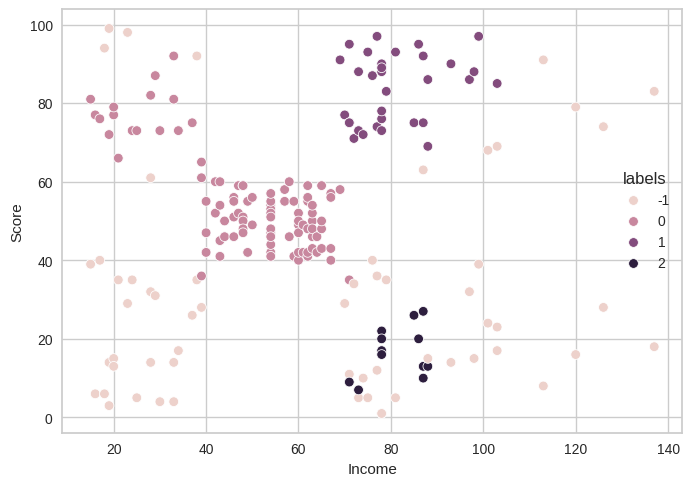

In [167]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=12,min_samples=6)
dbscan.fit_predict(x)
x['labels']=dbscan.labels_
sns.scatterplot(x='Income',y='Score',hue='labels',data=x)

In [168]:
dbsilscore=silhouette_score(x,dbscan.labels_)
print(dbsilscore)

0.18143767183305212


<Axes: xlabel='Income', ylabel='Score'>

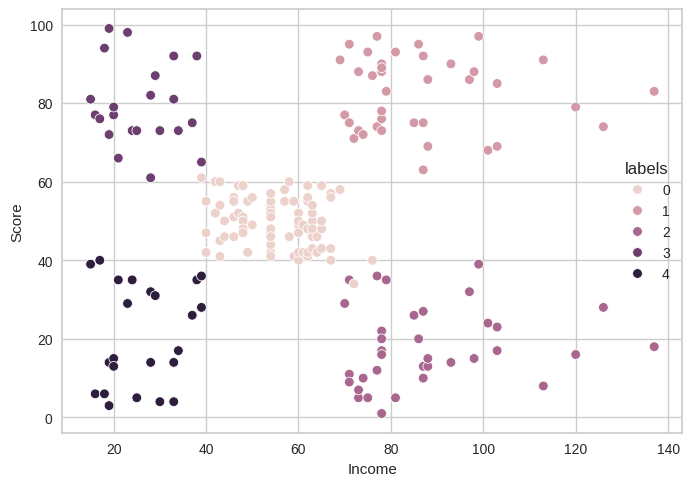

In [175]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth=estimate_bandwidth(x,quantile=0.1)
meanshift=MeanShift(
    bandwidth=bandwidth,
    bin_seeding=True
)
meanshift.fit_predict(x)
x['labels']=meanshift.labels_
sns.scatterplot(x='Income',y='Score',hue='labels',data=x)

In [176]:
meansilscore=silhouette_score(x,meanshift.labels_)
print(meansilscore)

0.4453701458195977
